Iris의 세 가지 품종, 분류해 볼까요? 
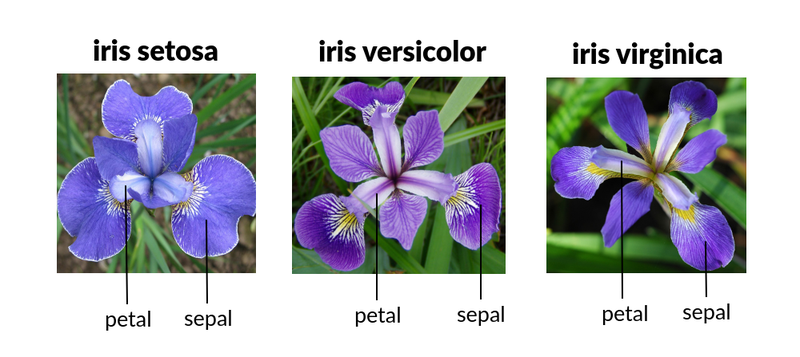

-  petal: 꽃잎, sepal: 꽃받침


In [1]:
from sklearn.datasets import load_iris
# sklearn 라이브러리의 datasets 패키지에서 load_iris 함수를 임포트함

iris = load_iris()
# load_iris 함수는 iris 데이터셋을 로드하는 함수
# 로드된 iris 데이터셋을 iris라는 변수에 저장

print(dir(iris))
# dir()는 객체가 어떤 변수와 메서드를 가지고 있는지 나열함

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [2]:
iris.keys()
# iris 데이터셋에 담긴 정보 종류 확인

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
iris_data = iris.data
# keys에서 확인한 정보 중 data를 따로 iris_data 변수에 저장

print(iris_data.shape) 
# shape는 배열의 형상정보를 출력
# 150개의 데이터가 각각 4개의 정보를 담고 있음

(150, 4)


In [4]:
iris_data[0]
# sepal length, sepal width, petal length, petal width

array([5.1, 3.5, 1.4, 0.2])

위 네가지 정보로 붓꽃의 종류가 setosa, versicolor, virginica 세 가지 중 무엇인지 맞추고자 함
- 꽃잎, 꽃받침의 길이와 폭 정보를 입력했을 때, 붓꽃의 품종을 출력하도록 학습

In [5]:
iris_label = iris.target
# keys에서 확인한 정보 중 target을 따로 iris_label 변수에 저장

print(iris_label.shape)
iris_label
# iris_data와 다르게 150개의 숫자만 가지고 있음

(150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
iris.target_names
# keys에서 확인한 정보 중 target_names를 변수에 따로 저장하지 않고 호출
# iris_label이 가진 0,1,2의 이름 확인

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
print(iris.DESCR)
# keys에서 확인한 정보 중 DESCR을 변수에 따로 저장하지 않고 호출
# 데이터셋 설명서 출력

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
iris.feature_names
# keys에서 확인한 정보 중 feature_names를 변수에 따로 저장하지 않고 호출
# iris.data에서 확인한 4개 정보의 변수명 확인

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
iris.filename
# keys에서 확인한 정보 중 filename을 변수에 따로 저장하지 않고 호출
# 데이터셋의 이름 출력

'iris.csv'

14-4. 첫 번째 머신러닝 실습, 간단하고도 빠르게! (1) 머신러닝 모델을 학습시키기 위한 문제지와 정답지 준비

In [10]:
import pandas as pd
# pandas 라이브러리를 pd라는 약칭으로 임포트

print(pd.__version__)
# pandas의 버전 확인

1.3.3


In [11]:
type(iris_data)
# iris_data의 데이터 타입은 numpy의 ndarray인 것을 확인할 수 있음

numpy.ndarray

In [12]:
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
# 150개 데이터가 각각 4개의 정보를 가지고 있던 iris_data를 
# iris.feature_names을 컬럼명으로 하는 DataFrame 자료형으로 변환해서 iris_df 변수에 저장
# (원래 iris_data는 배열(np.array) 자료형이었음!)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
iris_df["label"] = iris.target
# iris_df에 label이라는 컬럼을 새로 추가
# 150개의 숫자로 이루어져 있었던 iris.target를 label 컬럼에 채워넣기
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


- 문제지 : 머신러닝 모델에게 입력되는 데이터. feature라고 부르기도 한다. 변수 이름으로는 X를 많이 사용한다.
- 정답지 : 머신러닝 모델이 맞혀야 하는 데이터. label 또는 target이라고 부르기도 한다. 변수 이름으로는 y를 많이 사용한다.

In [14]:
from sklearn.model_selection import train_test_split
# sklearn model_selection패키지의 train_test_split 함수를 임포트

X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=7)
# 나눠야 할 데이터(문제지, X): iris_data
# 데이터의 라벨(정답, y): iris_label
# iris_data와 iris_label를 각각 train:test = 8:2의 비율로 잘라서 
# X_train, X_test, y_train, y_test에 저장


print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))
# len은 배열의 길이를 출력

X_train 개수:  120 , X_test 개수:  30


In [15]:
X_train.shape, y_train.shape
# train의 형상정보 확인

((120, 4), (120,))

In [16]:
X_test.shape, y_test.shape
# test의 형상정보 확인

((30, 4), (30,))

In [17]:
y_train, y_test
# label이 잘 분리되었는지 확인

(array([2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2, 1, 2, 2, 1, 0, 1, 1, 2, 0, 0, 0,
        2, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 0,
        1, 2, 1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 2,
        0, 0, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 0, 2, 0, 0, 1,
        1, 2, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 2,
        0, 2, 1, 1, 0, 2, 1, 2, 1, 0]),
 array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
        1, 2, 2, 2, 1, 1, 2, 2]))

14-5. 첫 번째 머신러닝 실습, 간단하고도 빠르게! (2) 첫 번째 머신러닝 모델 학습시키기

- 지도학습. 붓꽃 품종에 대한 정답이 존재하기 때문이다.
- 분류 문제. 세 가지 품종 중 하나로 분류하는 문제이기 때문이다.
- feature 데이터를 입력받으면 setosa, versicolor, virginica 세 가지 품종 중 하나로 분류

    - 회귀 : 카테고리를 분류하는 것이 아니라, 실제 값의 수치를 어림해서 맞히는 거

In [18]:
from sklearn.tree import DecisionTreeClassifier 
# sklearn.tree 패키지에서 의사결정트리 모델 import

decision_tree = DecisionTreeClassifier(random_state=32) 
# random_state : 재현가능하도록 난수의 초기값 32로 설정
print(decision_tree._estimator_type)

classifier


In [19]:
# 학습데이터 X_train, y_train로 의사결정나무 모델로 학습하기
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=32)

14-6. 첫 번째 머신러닝 실습, 간단하고도 빠르게! (3) 첫 번째 머신러닝 모델 평가하기

In [20]:
# 테스트데이터 X_test로 예측하기
y_pred = decision_tree.predict(X_test)
y_pred

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2])

In [21]:
# 진짜 정답
y_test

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 1, 1, 2, 2])

In [22]:
# 실제 정답 y_test과 예측값 y_pred 비교하여 정확도 측정하기
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9

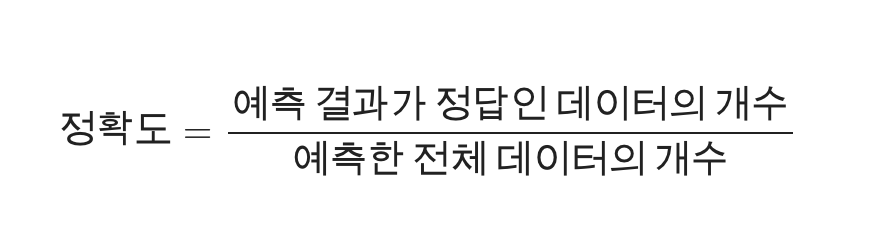
- 정확도는 전체 개수 중 맞은 것의 개수 의 수치

14-7. 첫 번째 머신러닝 실습, 간단하고도 빠르게! (4) 다른 모델도 해 보고 싶다면? 코드 한 줄만 바꾸면 돼!

In [23]:
# (1) 필요한 모듈 import
from sklearn.datasets import load_iris #싸이킷런 데이터셋에 있는 iris를 불러오는 코드
from sklearn.model_selection import train_test_split 
#싸이킷런에 있는 데이터를 train과 test dataset으로 나누어주는 함수 import
from sklearn.tree import DecisionTreeClassifier 
# 싸이킷런에 있는 결정트리분류기를 사용하기 위해 불러오는 코드
from sklearn.metrics import classification_report 
#싸이킷런에 있는 분류 결과에 대한 시각화를 위해 쓰는 코드

# (2) 데이터 준비
iris = load_iris() #iris 데이터 전체를 불러온다.
iris_data = iris.data #iris데이터의 data컬럼을 분류해 iris_data 변수에 담는다.
iris_label = iris.target #iris데이터의 target컬럼을 분류해 iris_label 변수에 담는다.

# (3) train, test 데이터 분리
#train_test_split()를 사용하여 X값, y값을 각각 train data와 test data로 나눈다. 
#함수에 들어 갈 파라미터로는 x,y가 들어가고
#test_size는 몇대몇으로 나눌지 정하는 옵션, random_state는 랜덤 패턴의 값을 지정한다. 
#(어떤 값을 넣어도 무방하다.)
X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=7) 


# (4) 모델 학습 및 예측
decision_tree = DecisionTreeClassifier(random_state=32) #결정트리분류기의 객체를 만든다.
decision_tree.fit(X_train, y_train) # 분류기에 x와 y의 훈련 데이터를 넣어 훈련 시킨다.
y_pred = decision_tree.predict(X_test) 
# 훈련된 분류기에 X_test라는 테스트 데이터셋을 넣어 얼마나 예측했는지 확인한다.

print(classification_report(y_test, y_pred)) 
# 결과를 지표로 확인하기 위해 classification_report를 활용해 y_test, y_pred 값을 넣어 확인한다.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.91      0.83      0.87        12
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



Random Forest

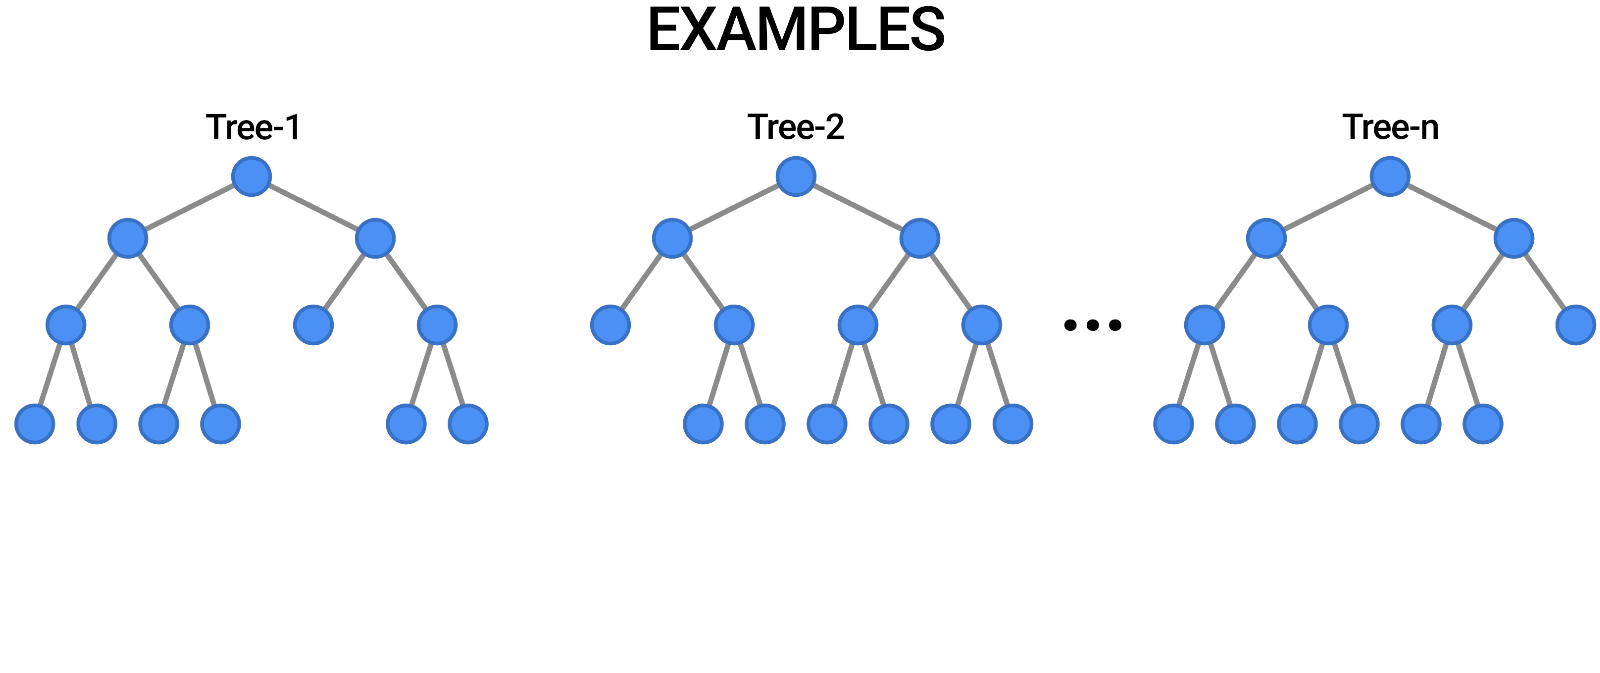

In [24]:
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트라는 분류기를 사용하기 위해 import

X_train, X_test, y_train, y_test = train_test_split(iris_data, # iris 데이터의 data 컬럼
                                                    iris_label, # iris 데이터의 target 컬럼
                                                    test_size=0.2, # test_size : train data와 test data를 몇대몇으로 나눌지 정하는 옵션
                                                    random_state=21) # random_state : 랜덤 패턴의 값을 지정

random_forest = RandomForestClassifier(random_state=32) # RandomForest분류기 객체를 생성
random_forest.fit(X_train, y_train) # 훈련
y_pred = random_forest.predict(X_test) # 예측

print(classification_report(y_test, y_pred)) # 결과 지표를 확인

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



In [25]:
# svm
from sklearn import svm #Support Vector Machine을 사용하기 위해 import
svm_model = svm.SVC() # 모델 객체를 만든다.

print(svm_model._estimator_type) # 이 모델이 어떤 타입인지 확인한다.

classifier


In [26]:
svm_model.fit(X_train, y_train)
pred = svm_model.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      0.83      0.87        12
           2       0.75      0.86      0.80         7

    accuracy                           0.90        30
   macro avg       0.89      0.90      0.89        30
weighted avg       0.91      0.90      0.90        30



In [27]:
# SGD Classifier
from sklearn.linear_model import SGDClassifier #선형분류기인 SGDClassifier를 사용하기 위한 import
sgd_model = SGDClassifier() # 모델 객체 생성

print(sgd_model._estimator_type) # 이 모델의 타입을 확인

classifier


In [30]:
sgd_model.fit(X_train, y_train)
pred = sgd_model.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.75      1.00      0.86        12
           2       1.00      0.71      0.83         7

    accuracy                           0.87        30
   macro avg       0.92      0.84      0.86        30
weighted avg       0.90      0.87      0.87        30



In [31]:
# logistic Regression
from sklearn.linear_model import LogisticRegression # 선형분류기인 LogisticRegression를 사용하기 위한 import
logistic_model = LogisticRegression() # 모델 객체 생성

print(logistic_model._estimator_type) # 이 모델의 타입을 확인

classifier


In [32]:
logistic_model.fit(X_train, y_train)
pred = logistic_model.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



14-8. 내 모델은 얼마나 똑똑한가? 다양하게 평가해 보기 (1) 정확도에는 함정이 있다

In [33]:
# Mnist
from sklearn.datasets import load_digits

digits = load_digits() # Dictionary 자료형과 유사한 sklearn.utils.Bunch 자료형 
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [34]:
digits_data = digits.data
digits_data.shape  # (손글씨 이미지의 개수, 이미지 당 Pixel 수)

(1797, 64)

In [35]:
digits_data[0] # 각 이미지가 64개의 Piexel로 구성된 것을 확인할 수 있습니다.

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

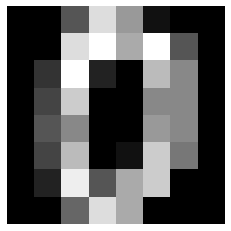

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline 
# 브라우저에서 바로 그림을 볼 수 있게 해주는 역할을 합니다 

plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

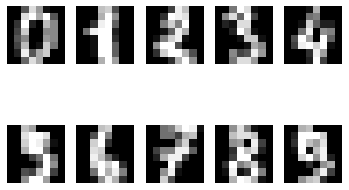

In [37]:
for i in range(10):
    plt.subplot(2, 5, i+1) # 10개의 이미지를 2행 5열로 표시
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray') 
    # plt.imshow()는 (m,n) 형태의 데이터를 입력으로 받기 때문에
    # 데이터셋 내의 1열로 펼쳐진 64개의 데이터를 원래의 이미지 형태인 (8,8)로 복원
    # cmap은 해당 이미지의 색상을 지정(gray는 흑백으로 출력)
    plt.axis('off') # 축을 보이지 않게 해줍니다. 
plt.show()

In [38]:
digits_label = digits.target # 각 이미지가 나타내는 숫자를 의미합니다.
print(digits_label.shape)
digits_label[:20]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

다만 이번에는 정확도의 함정을 확인하는 실험이기 때문에 약간의 장치를 넣어볼 것입니다.

숫자 10개를 모두 분류하는 것이 아니라, 해당 이미지 데이터가 3인지 아닌지를 맞히는 문제로 변형해서 풀어보는 것입니다. 즉 입력된 데이터가 3이라면 3을, 3이 아닌 다른 숫자라면 0을 출력하도록 하는 모델을 생각해 보겠습니다.

In [40]:
new_label = [3 if i ==3 else 0 for i in digits_label]
new_label[:20]

[0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0]

In [42]:
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier

'''
sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)


# test_size : 전체 데이터 셋 중 Test Dataset에 포함하려고 하는 비율 
# shuffle : Training Dataset과 Test Dataset으로 나누기 전에, 데이터들을 뒤섞을지 여부
'''
X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                    new_label,
                                                    test_size=0.2,
                                                    random_state=42)

decision_tree = DecisionTreeClassifier(random_state=15)
decision_tree.fit(X_train, y_train) # 의사결정나무 모델로 학습
y_pred = decision_tree.predict(X_test) # 테스트 결과 예측

accuracy = accuracy_score(y_test, y_pred) # y_pred(답안지)를 y_test(정답지)로 채점
accuracy # 정확도 출력

0.9722222222222222

- 데이터 불균형(unbalanced data)
    - 정답 데이터인 label은 0이 매우 많고 3은 적은 불균형 데이터
    - 9개의 숫자들은 label이 모두 0이 되었고, 3만 3으로 ⇢ 대략 90% label 모두 0
    - 모델이 전혀 학습하지 않고 정답을 모두 0으로만 선택해도 정확도 90%가량
 

In [44]:
fake_pred = [0] * len(y_pred) # 0으로만 이루어진 가짜 답안지 준비

accuracy = accuracy_score(y_test, fake_pred) # fake_pred(가짜 답안지)를 y_test(정답지)로 채점
accuracy # 정확도 출력

0.9055555555555556

14-9. 내 모델은 얼마나 똑똑한가? 다양하게 평가해 보기 (2) 정답과 오답에도 종류가 있다!


In [45]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[322,   4],
       [  6,  28]])

TN(322),FP(4),FN(6),TP(28)의 개수

In [46]:
confusion_matrix(y_test, fake_pred)

array([[326,   0],
       [ 34,   0]])

모든 데이터를 0인 Negative로 예측했기에 FP, FN = 0

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       326
           3       0.88      0.82      0.85        34

    accuracy                           0.97       360
   macro avg       0.93      0.91      0.92       360
weighted avg       0.97      0.97      0.97       360



In [48]:
print(classification_report(y_test, fake_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       326
           3       0.00      0.00      0.00        34

    accuracy                           0.91       360
   macro avg       0.45      0.50      0.48       360
weighted avg       0.82      0.91      0.86       360



이게 무슨 일이죠? 0에 대한 precision과 recall은 0.93, 1로 매우 높지만 3에 대한 precision과 recall은 둘 다 0입니다. 이건 큰 문제입니다. 0은 잘 잡아내지만, 3은 단 하나도 맞추지 못했다는 뜻이니까요.

In [49]:
accuracy_score(y_test, y_pred), accuracy_score(y_test, fake_pred)

(0.9722222222222222, 0.9055555555555556)

14-10. 데이터가 달라도 문제 없어요!
